- ##### Big Data Mart Sales Problem

- ##### Problem Statement:

 The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

 Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 




In [8]:
# Impoting necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [9]:
# READING THE CSV FILE OF TRAIN DATA:
train = pd.read_csv("bigdatamart_Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- As we can see there are 12 columns, where 11 columns are the Independent Variables (Feature), where 3 out of 11 columns are containing Continuous data (1 column is containing integer as well) and 7 columns consist of categorical Values (Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type and Outlet_Type).We can also see that it consists of a dependent variable i.e Item_Outlet_Sales column. Depending upon the 12 different features we need to predict the sales of Bigmart. So, it is a Regression Problem.

Now let's check the Test column as well:

In [4]:
#READING THE CSV FILE OF TEST DATA:
test = pd.read_csv("bigdatamart_Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


- As we can see the test dataset is containing 11 columns, where all the 11 columns are the Independent Variables (Feature), where 3 out of 11 columns are containing Continuous data (1 column is containing integer as well) and 7 columns consist of categorical Values (Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type and Outlet_Type). But in this case the Label data is missing as we will use this dataset to predict the sale . So we will go through each and every column of this dataset like the training dataset. And will check the result in the end.

In [4]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- As we can see there are different data types are present in Train dataset. The columns, like Item_Identifier, Item_Fat_Content, Item_Type,Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type are containing objects. Item_Weight, Item_Visibility, Item_MRP and Item_Outlet_Sales are containing floats. And Outlet_Establishment_Year is containing integers only.

In [5]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

- As we can see there are different data types are present in test dataset also. The columns, like Item_Identifier, Item_Fat_Content, Item_Type,Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type are containing objects. Item_Weight, Item_Visibility, Item_MRP  are containing floats. And Outlet_Establishment_Year is containing integers only.

In [6]:
train.shape

(8523, 12)

- train dataset is having 8523 rows and 12 columns.

In [7]:
test.shape

(5681, 11)

- test dataset is having 5681 rows and 11 columns as it excludes the label column.

In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

- train dataset has these columns - 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type',   'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type',       'Item_Outlet_Sales'. Out of which Item_Outlet_Sales is the dependent variable.

In [9]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

- test dataset has these columns - 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type',   'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'. But no Label is present in this dataset. 

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- As we can see most of the columns are containing 8523 counts of values whereas Item_Weight is containing 7060, Outlet_Size is containg 6113 counts of values. It means there is missing values in those columns that will need to deal with during data cleaning of train dataset.

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


- As we can see most of the columns are containing 5681 counts of values whereas Item_Weight is containing 4705,   Outlet_Size is containg 4075 counts of values. It means there is missing values in those columns that will need to deal  with during data cleaning of test dataset.

Now let's check the Statistics of the given datasets:

In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Let's Analyse the train dataset:

- Various factors are important for statistical means like mean, standard deviation, median, count of values and maximum  values of numerical variables of our dataset (train). By seeing the table we can conclude that, 

1. As the dataset is containing 8523 count of values, there is some missing values present in Item_weight as it contains 7060 out of 8523 counts of values.
2. In Item Visibility the minimum value is showing 0.000000, which is not possible in real time, so there maybe some skewness present that we need to deal with later.
3. Minimum Item_MRP is the price of each product , so it shows the price ranges from 31.29 to 266.88.
4. The different outlets established on different years ranges from 1985 to 2009.


In [13]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Let's Analyse the test dataset:

1. As the dataset is containing 5681 count of values, there is some missing values present in Item_weight as it contains 4705 out of 8523 counts of values.
2. In Item Visibility the minimum value is showing 0.000000, which is not possible in real time, so there maybe some skewness present that we need to deal with later.
3. Minimum Item_MRP is the price of each product , so it shows the price ranges from 31.99 to 266.58.
4. The different outlets established on different years ranges from 1985 to 2009.



In [14]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- As we have already seen there are some missing values present in Item_weight column and Outlet_size of train dataset. So, the count of the missing values is 1463 for Item_Weight and 2410 for Outlet_ Size. We will correct those missing values in data cleaning part.                 

In [5]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- As we have already seen there are some missing values present in Item_weight column and Outlet_size of test dataset as well. So, the count of the missing values is 976 for Item_Weight and 1606 for Outlet_ Size. We will correct those missing values in data cleaning part.

- ##### Data analysis:

 We need to analyze each continuous as well as categorical variables of the train and test datasets before model creation. We need to analyze the relations of feature vs features as well as feature vs label to understand which features are more important for the prediction. Let's do that for both of the datasets(train,test).
 
- ###### Univariate analysis:

Let's check the distribution of continuous independent variables first,

In [16]:
# only taking the continuous features of train dataset:
train_features=train[['Item_Weight',
       'Item_Visibility', 'Item_MRP']]

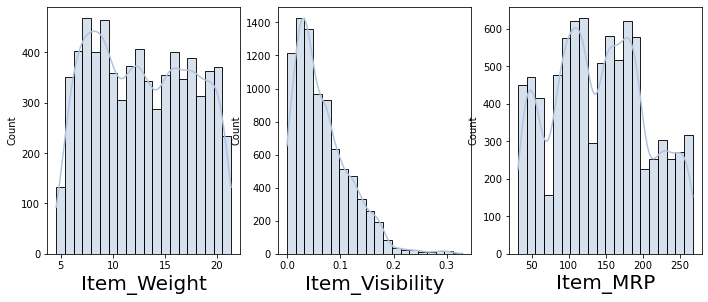

In [17]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.histplot(train_features[column],kde=True,bins=20,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- In this case it's obvious to having little bit of skewness in Item_weight as it shows the weight of different things.
- But ist's not possible Item_Visibility to be '0'. We need to take care of the skewness as well as it is right skewed.
- In case of Item_MRP it's obvious to having little bit of skewness in Item_MRP as it shows the price of different things.

In [18]:
# only taking the continuous features of test dataset:
test_features = test[['Item_Weight',
       'Item_Visibility', 'Item_MRP']]

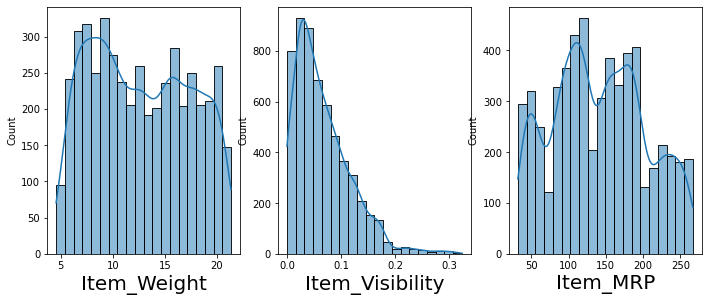

In [19]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in test_features:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.histplot(test_features[column],kde=True,bins=20)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- In test dataset also it's obvious to having little bit of skewness in Item_weight as it shows the weight of different things.
- But ist's not possible Item_Visibility to be '0'. We need to take care of the skewness as well as it is right skewed.
- In case of Item_MRP it's obvious to having little bit of skewness in Item_MRP as it shows the price of different things.

Now, let's Check the outliers of both the datasets:

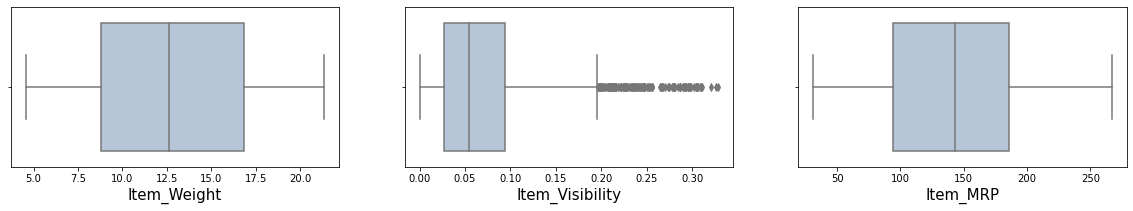

In [20]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train_features[column],color='lightsteelblue')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- As we can see there is outliers present in Item_Visibility variable in train dataset. We need to take care of this outliers before model creation.

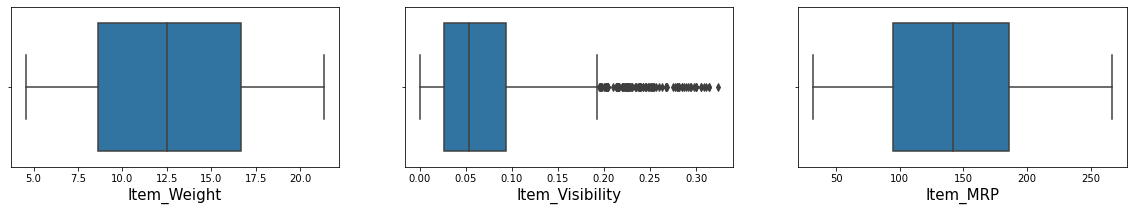

In [21]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in test_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- As we can see there is outliers present in Item_Visibility variable in test dataset as well. We need to take care of this outliers before model prediction.

- Now let's check the categorical variables of train and test dataset also:

 For analyzing first we will use value_counts() method then visualization technique.

In [22]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- As we can see there are 5 types fat content present in 'Item_Fat_Content' variable of train dataset. And each of the different variant is having different counts. AS it seems that Low Fat,low fat,LF all are same and Reguler, reg are same it can be corrected as 'Low' and 'Reguler'. That we will do in data cleaning part.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

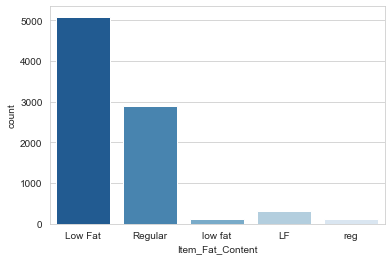

In [23]:
sns.set_style('whitegrid')
sns.countplot(train['Item_Fat_Content'],palette='Blues_r')

- As we can see that the outlets mainly stocks up low fat products more. Maybe Low fat products sell more than Reguler fat content products. We can check that sale vs product's fat content relation in bivariate analysis. And as it seems Low fat,low_fat,LF all are same and Reguler and Reg are same we will combine these into two categories only before model creation.

Now let's check the same column of test dataset as well:

In [24]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

- As we can see there are 5 types fat content present in 'Item_Fat_Content' variable of test dataset. And each of the different variant is having different counts. As it seems that Low Fat,low fat,LF all are same and Reguler, reg are same it can be corrected as 'Low' and 'Reguler'. That we will do in data cleaning part.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

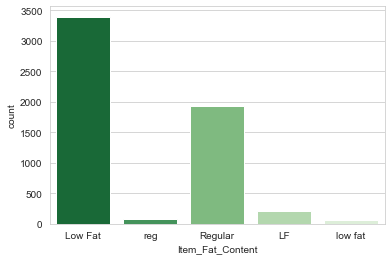

In [25]:
sns.set_style('whitegrid')
sns.countplot(test['Item_Fat_Content'],palette='Greens_r')

- As we can see may be Low fat products sell more than Reguler fat content products regarding to test dataset. And as it seems Low fat,low_fat,LF all are same and Reguler and Reg are same we will combine these into two categories only before model prediction.


Now Let's check the Item_type variable of train dataset:

In [26]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

- As we can see there are 16 different categories of things with 16 different values are present in the Item_type variable. Where fruirs and vegetables  are highest in counts 1232 and seafood has lowest in counts 64 in train dataset.

Let's visualize it:

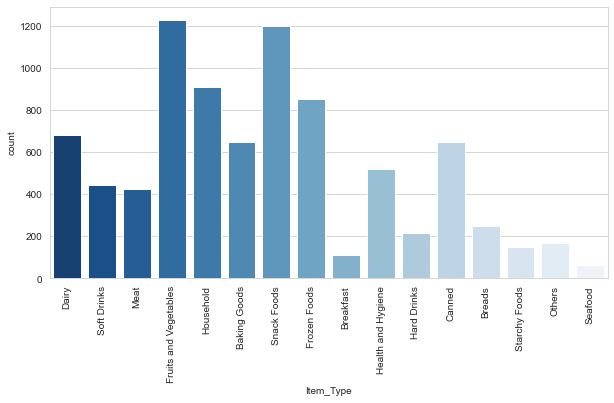

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(train['Item_Type'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show()

- As we can see followed by fruits and vegetables, Snack food is in 2nd highest in counts regarding to the train dataset. And House hold things, Frozen food, baking goods,canned food and dairy are also in the higherer side according to counts. Meat,soft drinks, health and hygine care products are in average counts. Lastly Breakfast, hard drinks etc these are lower in counts.

Now let's check the Item_type in test dataset:

In [28]:
test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

- As we can see there are 16 different categories of things with 16 different values are present in the Item_type variable in test dataset. Where fruirs and vegetables  are highest in counts 789 and seafood has lowest in counts 25 in this dataset.

Let's visualize it:

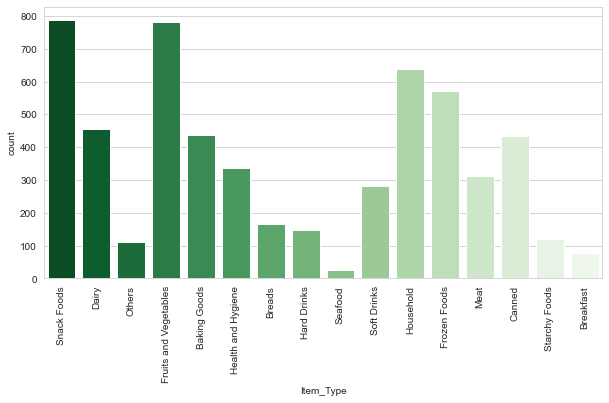

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(test['Item_Type'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show()

- As we can see followed by fruits and vegetables, Snack food is in 2nd highest in counts regarding to the test dataset. And House hold things, Frozen food, baking goods,canned food and dairy are also in the higherer side according to counts. Meat,soft drinks, health and hygine care products are in average counts. Lastly Breakfast, hard drinks etc these are lower in counts.


Now Let's check the 'Outlet_Establishment_Year' variable of train dataset:

In [34]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

- This column is containing the establishment years of the stores in train dataset. It ranges from 1985 to 2009.

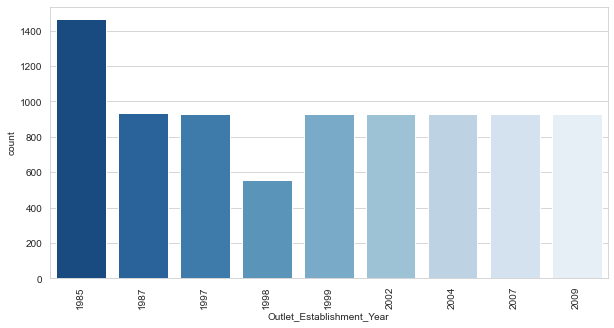

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Establishment_Year'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show()

- A big numbers of the stores are established on 1985. And in 1998 the number is lowest.

In [36]:
test['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

- This column is containing the establishment years of the stores in test dataset as well. It ranges from 1985 to 2009 as well.

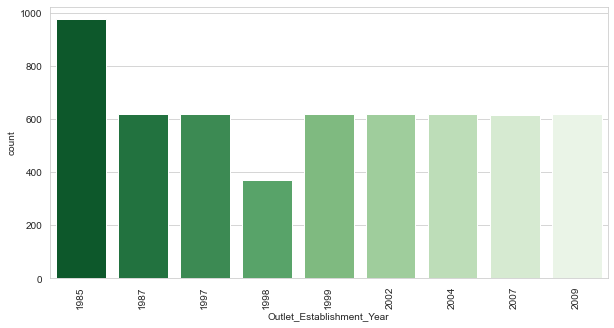

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(test['Outlet_Establishment_Year'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show()

- A highest number of the stores are established on 1985. And in 1998 the number is lowest.


Now Let's check the 'Outlet_Size' variable of train dataset:

In [38]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- As we can see the outlet size varies by High, Medium and Low and Medium sized stores are highest in counts i.e 2793 where as small size stores are 2388 in counts and Highest size stores are in lowest in counts i.e 932.

Let's visualize the outlet size of train dataset: 

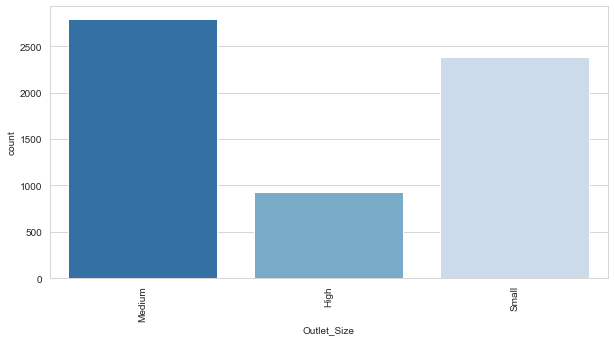

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Size'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show()

- As we have already seen the medium sized outlets are highest in numbers, small sized outlets are 2nd highest in numbers and Bigger sized outlets are lowest in numbers.


Now let's check the test dataset as well:

In [40]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

- As we can see the outlet size varies by High, Medium and Low and Medium sized stores are highest in counts i.e 1862 where as small size stores are 1592 in counts and Highest size stores are in lowest in counts i.e 621.


Let's visualize the outlet size of test dataset: 

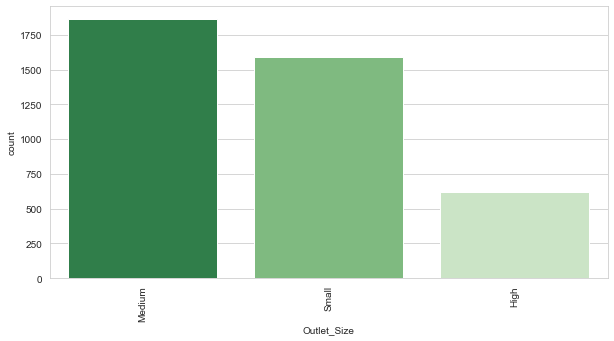

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(test['Outlet_Size'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show()

- As we have already seen the medium sized outlets are highest in numbers, small sized outlets are 2nd highest in numbers and Bigger sized outlets are lowest in numbers.


Now let's check the column Outlet_Location_Type in train dataset:

In [42]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

- As we can say by seeing the train dataset that these outlets are situated in tier 1, tier 2 and tier 3 cities. Where tier 3 cities are having 3350 counts of outlets(highest),tier 2 cities are having 2785 outlets and tier 1 cities are having 2388 outlets(lowest count).


Now let's visualize this:

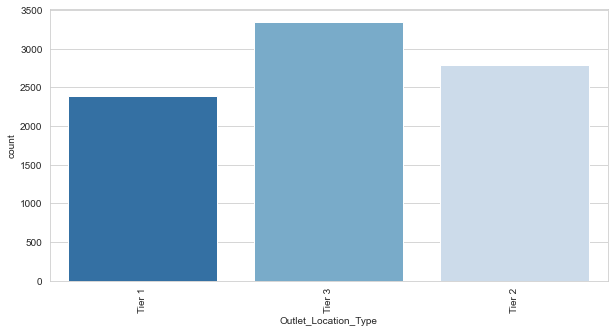

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Location_Type'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show()

- As we have already underdand that tier 3 cities are having highest counts of outlets where as tier 2 and tier 1 cities are having 2nd highest and lowest counts of outlets respectively as according to train dataset.

Now let's check the same column of test dataset as well:

In [44]:
test['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

- As we can say by seeing the test dataset that these outlets are situated in tier 1, tier 2 and tier 3 cities. Where tier 3 cities are having 2233 counts of outlets(highest),tier 2 cities are having 1856 outlets and tier 1 cities are having 1592 outlets(lowest count).


Now let's visualize this:

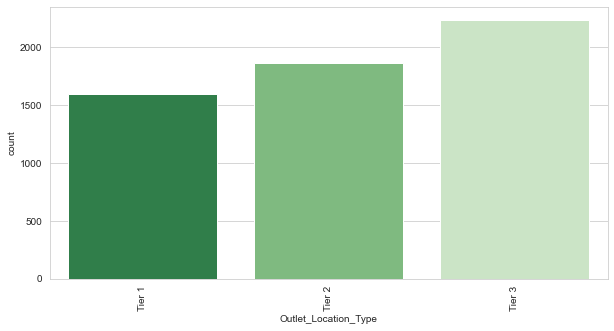

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(test['Outlet_Location_Type'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show()

- As we have already underdand that tier 3 cities are having highest counts of outlets where as tier 2 and tier 1 cities are having 2nd highest and lowest counts of outlets respectively as according to test dataset.

Now let's check the Outlet_Type column of train dataset:

In [46]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

- As we can see there are 3 types of supermarkets and 1 grocery store present in this train dataset. Supermaeket type1 is the highest in number 5577, Grocery store is in 2nd highest in number 1083, 3rd highest in counts is Supermarket type3 i.e 935 and Supermarket type2 is having 928 counts.

Let's visualize it:

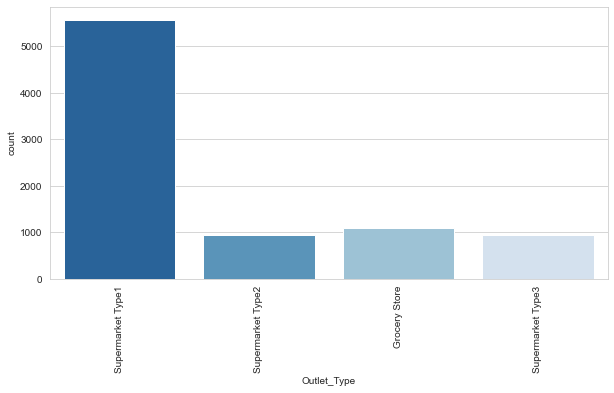

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Type'],palette='Blues_r')
plt.xticks(rotation=90)
plt.show()

- As we can see supermarket type 1 is highest in numbers and supermarket type 2 and 3 are almost same in counts and grocery store is 2nd highest in number but the difference of supermarket type 1 and grocery store is big.


Now let's check the test dataset as well:

In [48]:
test['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

- As we can see there are 3 types of supermarkets and 1 grocery store present in this test dataset. Supermaeket type1 is the highest in number 3717, Grocery store is in 2nd highest in number 722, 3rd highest in counts is Supermarket type3 i.e 624 and Supermarket type2 is having 618 counts.

Let's visualize it:

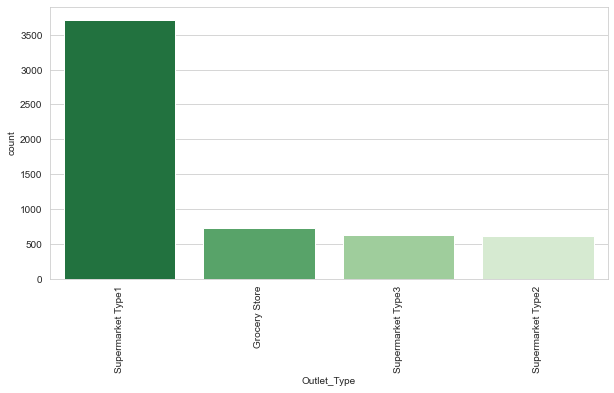

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(test['Outlet_Type'],palette='Greens_r')
plt.xticks(rotation=90)
plt.show()

- As we can see supermarket type 1 is highest in numbers and supermarket type 2 and 3 are almost same in counts and grocery store is 2nd highest in number but the difference of supermarket type 1 and grocery store is big.


Now let's check the relations beween features vs label. First we will check the relations of continuous variables with label then categorical variables with label:

- ###### Bivariate Analysis:

We will do Bivariate Analysis only in train dataset as it contains the label. So, first we will divide the train dataset in features and label before checking the relation.

In [50]:
#### dividing the feature and label for further operations:
y = train['Item_Outlet_Sales']
x = train.drop(columns=['Item_Outlet_Sales'])
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


- Let's visualize the relation between features and label of train dataset: 

For checking we are using scatter plot.

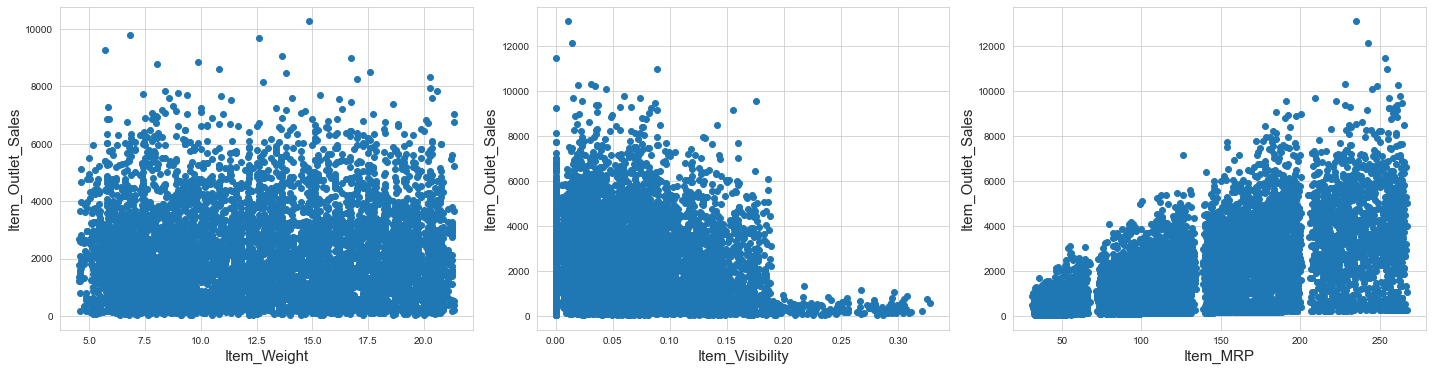

In [51]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(train_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Item_Outlet_Sales',fontsize=15)
    plotnumber+=1
plt.tight_layout()

- As we can see, there is a positive correlation between Item_MRP with Item_Outlet_Sales.
- The relation betweem Item_weight with item_outlet_sales is somewhat confusing or they are maybe not related that much.
- less visibility more Item_outlet_sale.

Now let's check the relations between Categorical features with Label:

For that we are checking relation between 'Item_Type' and 'Item_Outlet_Sales', let's do it:

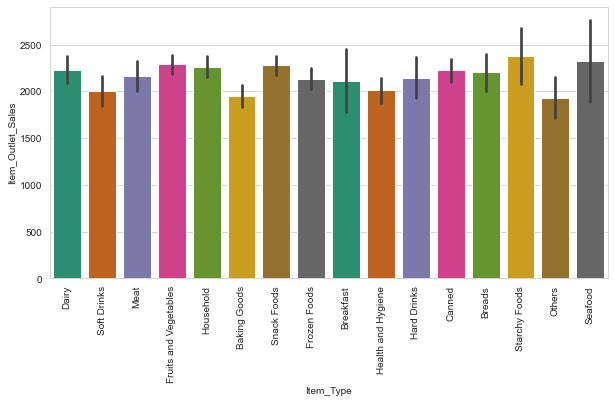

In [50]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='Dark2')
plt.xticks(rotation=90)
plt.show()

- As we can see, the sales of all the different categories of the products are more or less similer. There is no such product that sells most out of these categories.

- Now let's check relation between 'Outlet_Establishment_Year' and 'Item_Outlet_Sales':

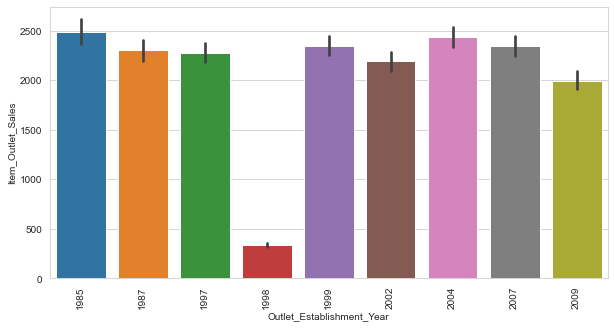

In [51]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)
plt.show()

- As we can see with respect to item_outlet_sale in 1985 it was highest, followed by 2004,2007,1999. The lowest selling was 1998 according to train dataset.


Now let's check relation between 'Item_Fat_Content' and 'Item_Outlet_Sales':

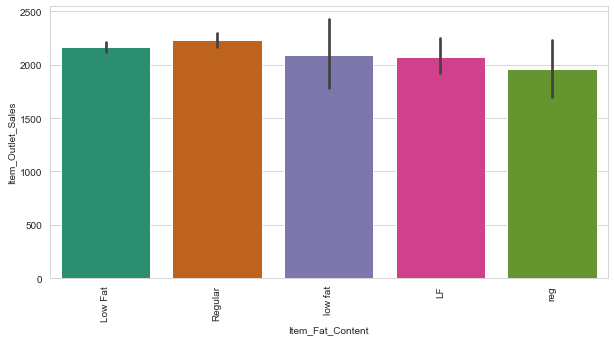

In [52]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show()

- As we can see sell of Reguler fat content products are little higher than low fat content food items. 


Now let's check relation between 'Outlet_Size' and 'Item_Outlet_Sales':

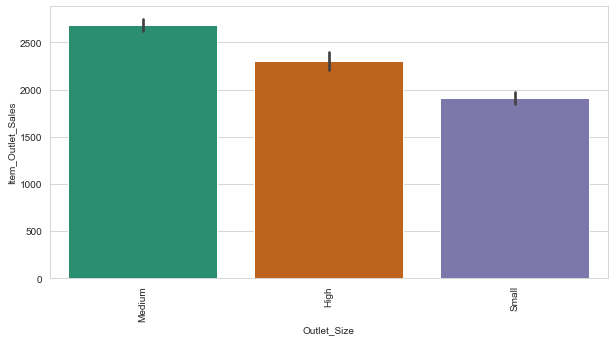

In [53]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show()

- As we can see, in selling point of view Medium sized Outlets are doing more transactions than big sized outlets and small sized outlets.


Now let's check relation between 'Outlet_Location_Type' and 'Item_Outlet_Sales':

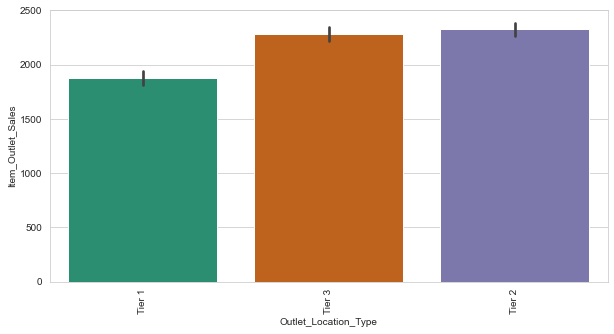

In [54]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show()

- As we can see tier 2 cities are making more Item_Outlet_Sales than tier 3 and tier 1 cities.


Now let's check relation between 'Outlet_Type' and 'Item_Outlet_Sales':

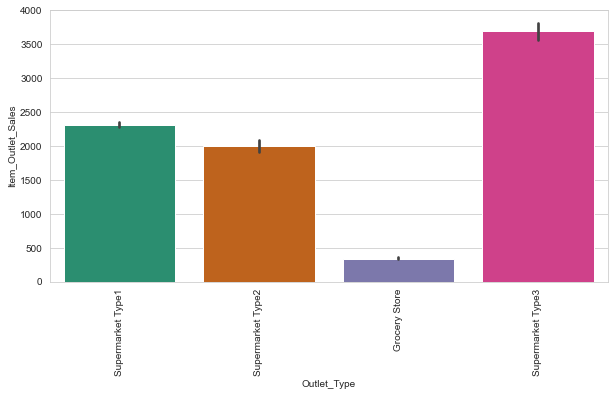

In [55]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show()

- As we can see supermarket type3 of outlet_type is very much positively connected with Item_outlet_sales than supermarket type1 and supermarket type2. And relation of Grocery store with Item_outlet_sales is lowest.


- ###### Multivariate Analysis:

- ###### Multicolinearity Detection:

Let's find the coefficient of multicolinearty to check if any feature is correlated to another featue or not. We will check presence of multicolinearity for both of the datasets(train and test):


In [56]:
corr=train.corr()
corr.shape

(5, 5)

###### Let's plot a heatmap for the train dataset first:

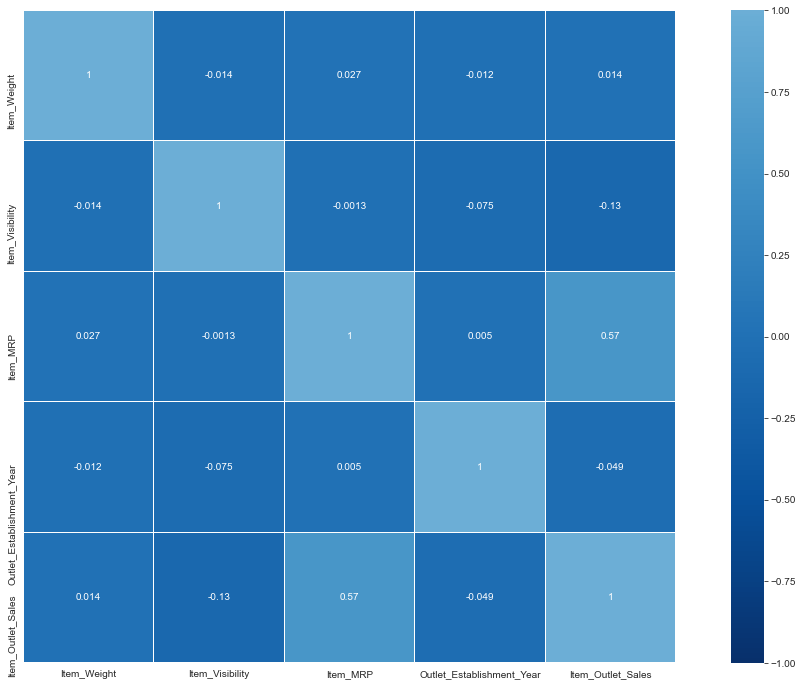

In [57]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(20,12))
sns.heatmap(corr,cbar=True,cmap='Blues_r',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- As we can see, Item_MRP and dependent variable Item_outlet_sales is positively correlated, that is a good thing. Other things are also looking good. No feature is correlated.

In [58]:
corr2=test.corr()
corr2.shape

(4, 4)

###### Let's plot a heatmap for the test dataset as well:

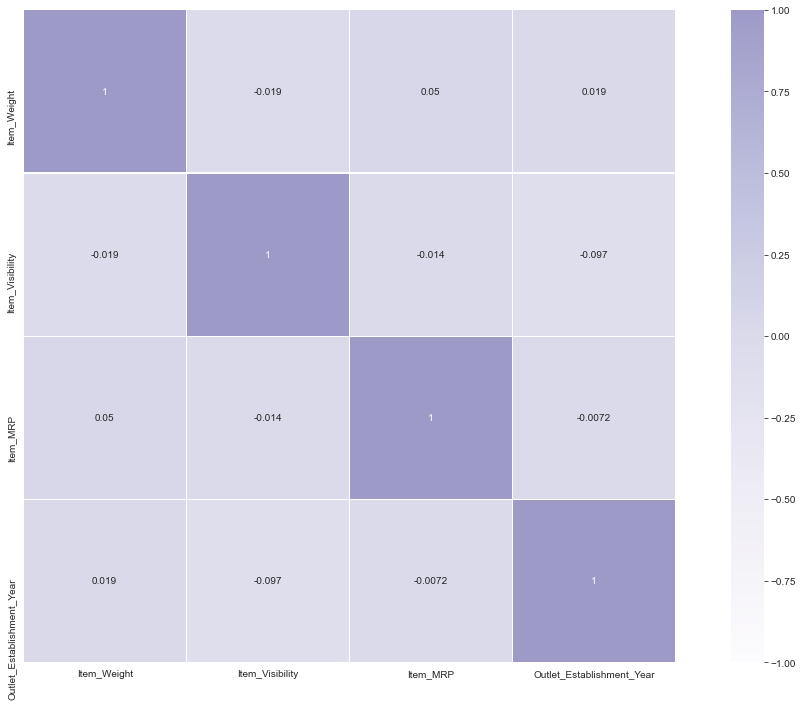

In [59]:
plt.figure(figsize=(20,12))
sns.heatmap(corr2,cbar=True,cmap='Purples',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- As we can see, Not a single feature is correlated.

- ###### Data preprocessing:

As we have already seen that both the datasets are having null values, zero values and nominal columns, we need to take care of those before any model creation and model prediction. Let's do it:


Firstly we will check the skewness of train dataset.

In [10]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

- We can see, there is no major skewness in the dataset, but 'item_Visibility' is somewhat right skewed.
 The integer data type column 'Outlet_Establishment_Year' is showing negative skewness as the estabishment have done in  different years in different manner . So, we can not say it's really skewed.
 
 
 Now we are going to replace zeroes('0') with mean of the same column  Item_Weight,Item_Visibility of train dataset as it's not possible in real world to have zero values in these columns.

In [11]:
train['Item_Weight']=train['Item_Weight'].replace(0,train['Item_Weight'].mean())
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())

###### As these columns are having skewness , we are going to use power transformer to remove those skewness, for that we are taking those columns in a different variable 'features'.

In [12]:
features=['Item_Weight','Item_Visibility']

###### After that we will use power transformer to making these variables more normally distribution like.

In [13]:
scaler=PowerTransformer(method='box-cox')

###### After that we will use Box-cox method of power transformer .

In [14]:
train[features]=scaler.fit_transform(train[features].values)

###### Power Transformer is also helping in scaling the perticular variables.

In [15]:
train[features]

,Item_Weight,Item_Visibility
0,-0.724816,-1.501937
1,-1.607953,-1.316587
2,0.994429,-1.458786
3,1.306332,0.174855
4,-0.814400,0.174855
...,...,...
8518,-1.344453,-0.035286
8519,-0.950337,-0.285645
8520,-0.420708,-0.645619
8521,-1.251896,1.395813


- As we can see the variables are scaled.

Now let's check the distribution of the variables( 'Item_Weight' and 'Item_visibility' ) of train dataset.

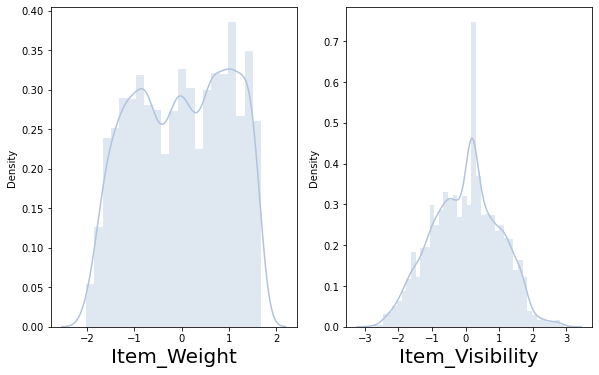

In [16]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in train[features]:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(train[column],kde=True,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- As we can see, now the variables of train dataset are looking more normal than before.


Now let's do the same with test dataset as well.

In [179]:
test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

- We can see, there is no major skewness in the test dataset, but 'item_Visibility' is somewhat right skewed. The integer data type column 'Outlet_Establishment_Year' is showing negative skewness as the estabishment have done in different years in different manner . So, we can not say it's really skewed.

Now we are going to replace zeroes('0') with mean of the same column Item_Weight,Item_Visibility of test dataset as it's not possible in real world to have zero values in these columns.

In [180]:
test['Item_Weight']=test['Item_Weight'].replace(0,test['Item_Weight'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())


In [181]:
features2=['Item_Weight','Item_Visibility']  # Doing the same thing that we have done with train dataset

In [182]:
scaler=PowerTransformer(method='box-cox')

In [183]:
test[features2]=scaler.fit_transform(test[features2].values)

In [184]:
test[features2]

,Item_Weight,Item_Visibility
0,1.582787,-2.199431
1,-0.924458,-0.539111
2,0.476526,0.793172
3,-1.185006,-1.555224
4,NaN,1.073814
...,...,...
5676,-0.391101,-1.682918
5677,-1.107989,1.387778
5678,-0.507249,0.334333
5679,0.612404,0.172221


- After scaling we are going to see if there any skewness present or not in those variables of test dataset.

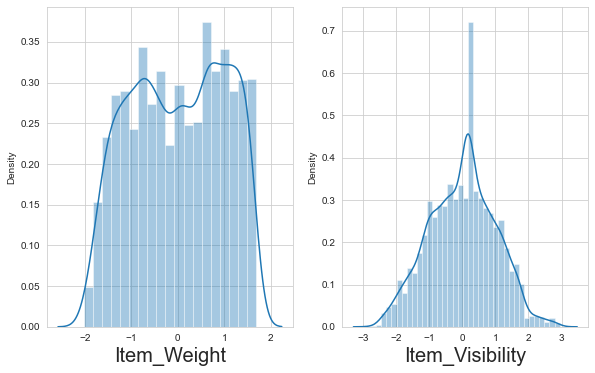

In [185]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in test[features2]:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(test[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- As we can see, both the columns are looking better than before.

##### Missing value replace:
Now next step is to replace those missing values of Item_Weight column of train dataset with mean of the same column.

In [73]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [74]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- As we can see there is no missing value present in Item_Weight of train dataset.


Now we are going to do the same with the test dataset as the column 'Item_Weight' is having missing values.

In [187]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [188]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- As we can see there is no missing value present in Item_Weight column of test dataset.


Now we are going to replacing the missing values of 'Outlet_size' with 0 of train dataset.

In [75]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(0) #replacing nan with 0.

In [76]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- As we can see, now there is no missing value present in the train dataset.

Let's do the same with test dataset to eliminate the missing values.

In [189]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(0) #replacing nan with 0.

In [190]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

- So there is no missing value present in the test dataset as well.

In [73]:
print(len(train.select_dtypes(include=['int64', 'float64']).columns), len(train.select_dtypes(include='object').columns))

5 7


In [76]:
print(len(test.select_dtypes(include=['int64', 'float64']).columns),len(test.select_dtypes(include='object').columns))

4 7


##### Since the column Outlet_Establishment_Year of train dataset shows the established year , it can be assumed that it till exists so assuming that outlets are still active we can get the number of years the outlet has been active for by substracting the establishment year from the current year(2021).

In [19]:
train['Outlet_Active_for'] = train['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
train= train.drop(columns=['Outlet_Establishment_Year'])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,FDA15,-0.724816,Low Fat,-1.501937,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,-1.607953,Regular,-1.316587,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,0.994429,Low Fat,-1.458786,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,1.306332,Regular,0.174855,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,-0.814400,Low Fat,0.174855,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


- So, we have created a different column 'outlet_active_for' as replacement of the column Outlet_establishment_year as we can see above table of train dataset.

Now Dropping those unnecessory columns are it does not related with prediction.

In [21]:
train.drop(columns=['Item_Identifier'],axis=1,inplace=True)

In [22]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,-0.724816,Low Fat,-1.501937,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,-1.607953,Regular,-1.316587,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,0.994429,Low Fat,-1.458786,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,1.306332,Regular,0.174855,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,23
4,-0.814400,Low Fat,0.174855,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


- As we can see there is no presence of Item_Identifier column.

- ##### Encoding: 

Now let's do encode categorical columns as much as possible by using different methods like label encoder and get_dummies.

- First we are going to use label encoder for the columns : 'Outlet_identifier','Item_Type' of train dataset.

In [23]:
le = LabelEncoder()
le_s = ['Outlet_Identifier','Item_Type']
for i in le_s:
    train[i] = le.fit_transform(train[i])

In [24]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,-0.724816,Low Fat,-1.501937,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,-1.607953,Regular,-1.316587,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228,12
2,0.994429,Low Fat,-1.458786,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,1.306332,Regular,0.174855,6,182.0950,0,NaN,Tier 3,Grocery Store,732.3800,23
4,-0.814400,Low Fat,0.174855,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052,34


- As we can see, The columns are encoded successfully.

Now we are going to use get_dummies to encode the rest of the categorical column:

In [25]:
 # droping the first column in the one-hot-encoded data to avoid collinearity
train= pd.get_dummies(data=train, drop_first=True)
train.shape

(8523, 18)

In [26]:
train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Active_for,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.724816,-1.501937,4,249.8092,9,3735.1380,22,1,0,0,0,1,0,0,0,1,0,0
1,-1.607953,-1.316587,14,48.2692,3,443.4228,12,0,1,0,0,1,0,0,1,0,1,0
2,0.994429,-1.458786,10,141.6180,9,2097.2700,22,1,0,0,0,1,0,0,0,1,0,0
3,1.306332,0.174855,6,182.0950,0,732.3800,23,0,1,0,0,0,0,0,1,0,0,0
4,-0.814400,0.174855,9,53.8614,1,994.7052,34,1,0,0,0,0,0,0,1,1,0,0


- As we can see now our train dataset is good to be scale and train as all the categorical variables are encoded.


Now it's time to process the test dataset as well. Let's do that.

##### Since the column Outlet_Establishment_Year of test dataset shows the established year , it can be assumed that it till exists so assuming that outlets are still active we can get the number of years the outlet has been active for by substracting the establishment year from the current year(2021).

In [28]:
test['Outlet_Active_for'] = test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
test= test.drop(columns=['Outlet_Establishment_Year'])
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Active_for
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1,14
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store,23
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1,14
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36


- So, we have created a different column 'outlet_active_for' as replacement of the column Outlet_establishment_year as we can see above table of test dataset.

In [29]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Active_for
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1,14
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store,23
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1,14
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36


Dropping the unnecessory column that does not related to label.

In [30]:
test.drop(columns=['Item_Identifier'],axis=1,inplace=True)

In [31]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Active_for
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1,14
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store,23
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1,14
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36


As we can see there is no presence of Item_Identifier column.


##### Encoding:

Now let's do encode categorical columns as much as possible by using different methods like label encoder and get_dummies.

First we are going to use label encoder for the columns : 'Outlet_identifier','Item_Type' of test dataset.



In [32]:
l = LabelEncoder()
l_s = ['Outlet_Identifier','Item_Type']
for i in l_s:
    test[i] = l.fit_transform(test[i])

In [33]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Active_for
0,20.750,Low Fat,0.007565,13,107.8622,9,Medium,Tier 1,Supermarket Type1,22
1,8.300,reg,0.038428,4,87.3198,2,NaN,Tier 2,Supermarket Type1,14
2,14.600,Low Fat,0.099575,11,241.7538,0,NaN,Tier 3,Grocery Store,23
3,7.315,Low Fat,0.015388,13,155.0340,2,NaN,Tier 2,Supermarket Type1,14
4,NaN,Regular,0.118599,4,234.2300,5,Medium,Tier 3,Supermarket Type3,36


- As we can say both the columns are encoded now.

Now we are going to use get_dummies to encode the rest of the categorical columns:

In [34]:
 # droping the first column in the one-hot-encoded data to avoid collinearity
test= pd.get_dummies(data=test, drop_first=True)
test.shape

(5681, 17)

In [35]:
test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Active_for,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,13,107.8622,9,22,1,0,0,0,1,0,0,0,1,0,0
1,8.300,0.038428,4,87.3198,2,14,0,0,0,1,0,0,1,0,1,0,0
2,14.600,0.099575,11,241.7538,0,23,1,0,0,0,0,0,0,1,0,0,0
3,7.315,0.015388,13,155.0340,2,14,1,0,0,0,0,0,1,0,1,0,0
4,NaN,0.118599,4,234.2300,5,36,0,1,0,0,1,0,0,1,0,0,1


- So, all the columns of test dataset is encoded successfully, now its time to train the train dataset. But before that we are going to divide the dataset into independent variables and dependent variable. Let's do that.

In [36]:
y=train['Item_Outlet_Sales']
x=train.drop(columns=['Item_Outlet_Sales'])

- Divition of the train dataset is done.



Now let's do scaling as the variables are in different sacles before model creation.

In [38]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

- ###### Hold Out Method:

Models will be built on Hold Out method(75/25 training and test split)to gauge how well the Regressor is working.


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

- ##### Model Creation:

Now we are going to build 5 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. RandomForestRegressor
4. AdaBoostRegressor
5. Gradient Boosting Regressor



- #### Linear Rgression:

In [89]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [90]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [91]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.5608264486511825


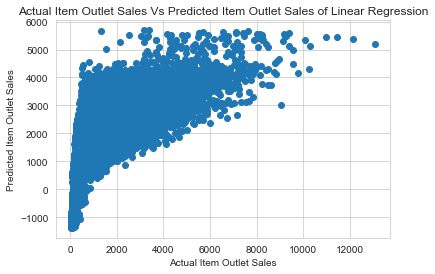

In [92]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Actual Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.title('Actual Item Outlet Sales Vs Predicted Item Outlet Sales of Linear Regression')
plt.show()

In [93]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

- ##### Evaluation of LR:

In [94]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)
print('Accuracy of LR :',lr_accuracy*100)

R Square Score of Linear Regression: 0.5696559008090036
Accuracy of LR : 56.96559008090036


In [95]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  802.3570911834962


In [96]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  1187309.5956095732


In [97]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  1089.637368856985


##### Scores of Linear Regression:

1. Accuracy - 0.5699731116791269
2. MAE of LR -   801.8733326957788
3. MSE of LR -  1186434.4180234573
4. RMSE of LR - 1089.235703612151

- ##### KNeighbors Regressor:

In [98]:
#Model Training:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [99]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [100]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.6735707026864746


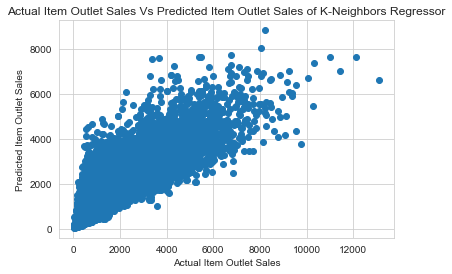

In [101]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.title('Actual Item Outlet Sales Vs Predicted Item Outlet Sales of K-Neighbors Regressor')
plt.show()

In [102]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

- ##### Evaluation of K-Neighbors Regressor:

In [159]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of knn :',kn_accuracy*100)

R Square Score of K-Neighbors Regressor: 0.5034400030528319
Accuracy of GBR : 50.34400030528319


In [104]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  824.8276578507742


In [105]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  1369997.7536105788


In [106]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  1170.469031461567


##### Scores of K-Neighbors Regressor:

1.    Accuracy - 0.517823180680788
2.    MAE of LR - 806.6034214922571
3.    MSE of LR - 1330314.8932085584
4.    RMSE of LR - 1330314.8932085584

- ##### Random Forest Regressor:

In [116]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [117]:
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)

In [118]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.9371259946541897


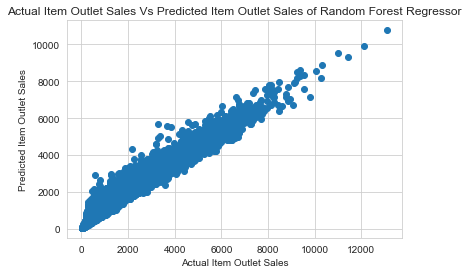

In [119]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.title('Actual Item Outlet Sales Vs Predicted Item Outlet Sales of Random Forest Regressor')
plt.show()

In [120]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

- ##### Evaluation of Random Forest Regressor:

In [158]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of GBR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.5609365175227562
Accuracy of GBR : 56.09365175227562


In [122]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))

mean absolute error of Random Forest Regressor:  767.1949756893476


In [123]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))

mean squared error of Random Forest Regressor is:  1211366.1760600107


In [124]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

Root mean squared error of Random Forest Regressor is:  1100.6208139318512


##### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.538953955284116
2.    MAE of RFR :  782.2057000724542
3.    MSE of RFR : 1272015.5660042153
4.    RMSE of RFR : 1127.8366752345905

- ##### Ada-Boost Regressor:

In [125]:
# Model Training:
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [126]:
#Model Prediction with trained data:
y_abr_pred = abr.predict(x_train)

In [127]:
print("R Square Score of Ada-Boost Regressor:",metrics.r2_score(y_train,y_abr_pred))

R Square Score of Ada-Boost Regressor: 0.4831157844740738


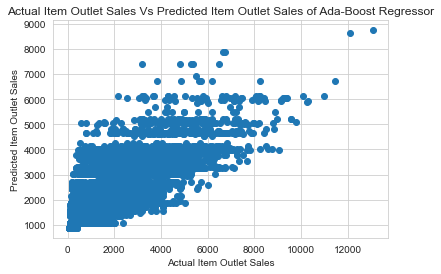

In [128]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_abr_pred)
plt.xlabel('Actual Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.title('Actual Item Outlet Sales Vs Predicted Item Outlet Sales of Ada-Boost Regressor')
plt.show()

In [129]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

- ##### Evaluation of Ada-Boost Regressor:

In [157]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of Ada-Boost Regressor:",abr_accuracy)
print('Accuracy of GBR :',abr_accuracy*100)

R Square Score of Ada-Boost Regressor: 0.45284336776427947
Accuracy of GBR : 45.28433677642795


In [131]:
print ('mean absolute error of Ada-Boost Regressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of Ada-Boost Regressor:  964.6406481243104


In [132]:
print ('mean squared error of Ada-Boost Regressor is: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of Ada-Boost Regressor is:  1509592.7212111314


In [133]:
print ('Root mean squared error of Ada-Boost Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of Ada-Boost Regressor is:  1228.6548421794998


##### Scores of Ada-Boost Regressor:

1.    Accuracy of ABR : 0.46650212980414785
2.    MAE of ABR : 940.2412556152913
3.    MSE of ABR : 1471908.5069635788
4.    RMSE of ABR : 1213.2223650112862


- ##### Gradient Boosting Regressor:

In [134]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [135]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [136]:
print("R Square Score of Gradient Boosting Regressor: ",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.6348637979095144


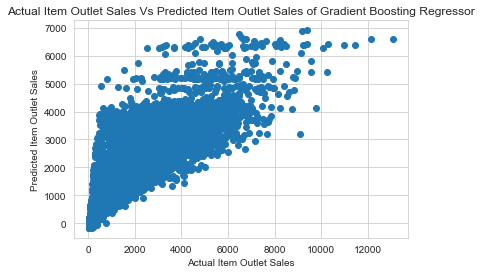

In [137]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.title('Actual Item Outlet Sales Vs Predicted Item Outlet Sales of Gradient Boosting Regressor')
plt.show()

In [138]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

- ##### Evaluation of Gradient Boosting Regressor:

In [139]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.5986033016990066
Accuracy of GBR : 59.86033016990066


In [140]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  736.4523792241887


In [141]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  1107444.374013021


In [142]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  1052.3518299566076


##### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 0.5973462317492662
2.    MAE of GBR : 737.6070370498364
3.    MSE of GBR : 1110912.601453539
4.    RMSE of GBR : 1053.9983877850757

- ##### Regulalization:

When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting.

- ##### Regularization using Lasso:

In [143]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [144]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.030206517770677472

In [145]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.030206517770677472)

In [146]:
lasso_reg.score(x_test,y_test)

0.56969359930442

- Lasso has also given us same accuracy as linear Regression.

- ##### Regularization Using Ridge:

In [147]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [148]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [149]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [150]:
ridge_model.score(x_test,y_test)

0.5696894579984669

- Both Lasso and Ridge is giving score of 56% as Linear Regression. Let's check overfitting once again using Cross Validation.

- ##### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

- ##### CV of Linear Regression:

In [151]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[0.56739621 0.55693433 0.56070454 0.56777084 0.53866596]
mean : 55.82943752896112


- ##### CV of K-Neighbors Regressor:

In [152]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.50164565 0.49422148 0.49065137 0.5062144  0.47048372]
mean : 49.26433243202637


- ##### CV of Random Forest Regressor:

In [154]:
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.5695396  0.53459952 0.55858564 0.56976692 0.53941623]
mean : 55.43815826490162


- ##### CV of Ada-Boost Regressor:

In [155]:
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean()*100)

[0.28717146 0.34965462 0.35983329 0.35233254 0.30778651]
mean : 33.13556843690443


- ##### CV of Gradient Boosting Regressor:

In [156]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.60020538 0.58619163 0.59667489 0.61773368 0.57284171]
mean : 59.472945829156586


- #### Selection of the best model for Big Data Mart Sales Problem:
 Now as we are bit confused as most of the models are showing almost same accuracy. Now let's check the difference between Accuracy Scores and Cross Validation Scores of the models to select the best model out of 5 models.

1. LR = 56.965-55.829 = 1.136, 
2. KNN = 50.344-49.264 = 1.08, 
4. RFR = 56.093-55.438 = 0.655, 
5. GBR = 59.860-59.472= 0.388
6. ABR = 45.284-33.135= 12.149

- ##### Observation:

 Overall the result of all models are not that good. As most of the Accuracy of the Models are between 47-59%.
So, as the difference of Accuracy Score and CV of Gradient Boosting Regressor is least, it's the best Model according to the result.
 

- ##### Hyperparameter Tuning:

 Now we will use Grid Search Technique to tune the hyperparameter of Gradient Boosting Regressor. After getting the best parameters we can put those into the model to obtain the best accuracy.

In [168]:
gbr = GradientBoostingRegressor()
search_grid = {'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],
               'subsample':[.5,.75,1],'random_state':[1]}

In [169]:
gbr_search=GridSearchCV(gbr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(x_train,y_train)
gbr_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1, subsample=1)

In [171]:
gbr= GradientBoostingRegressor(learning_rate=0.01,max_depth=4,n_estimators=500, random_state=1,
                          subsample=1) 
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [172]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
59.97824915985376


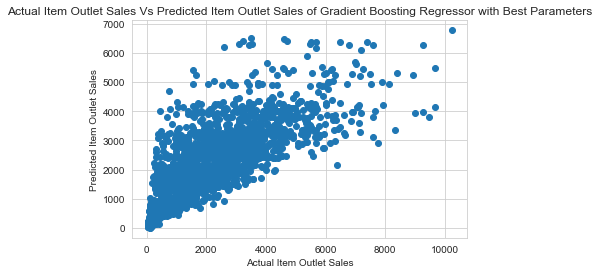

In [173]:
# Checking Actual sales Vs Predicted sales using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.title('Actual Item Outlet Sales Vs Predicted Item Outlet Sales of Gradient Boosting Regressor with Best Parameters')
plt.show()

###### As we can see Gradient Boosting Regressor  after hyperparameter tuning with GridSearchCV  gives  accuracy of almost 60% .  So, we are going to save Gradient Boosting Regressor  Model for Big Data Mart Sales Problem.

- ##### Now it's time for prediction using the test dataset as well:

In [198]:
X_test=test            # instantiating test dataset into X_test object

#### prediction by using test dataset with best model Gradient Boosting Regressor :

In [199]:
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(X_test)
score=gbr.score(x_train,y_train)
print(score,gbr,':')

0.6369798884036468 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1, subsample=1) :


- #### As we can see it is giving almost 64% accuracy.

In [205]:
#model(test dataset) prediction using gbr
x_predict = list(gbr.predict(X_test))
df_new = {'predicted_values':x_predict[0:1000],'orignal_values':y_test[0:1000]}
print(pd.DataFrame(df_new))

      predicted_values  orignal_values
7503       3728.041051       1743.0644
2957       3635.514619        356.8688
7031       3502.445851        377.5086
1084       3646.638807       5778.4782
856        3748.458801       2356.9320
...                ...             ...
5673       3576.601873       3243.7776
5457       3596.154072       1603.9122
8336       3823.694569        164.4526
4122       3902.193136       1549.9824
5328       3564.713844       3062.0142

[1000 rows x 2 columns]


- The prediction dataset has been made.

In [206]:
#importing joblib
import joblib

joblib.dump(gbr,'df_new.obj')

# SAVING THE MODEL

['df_new.obj']

In [207]:
gbr_joblib=joblib.load('df_new.obj')
gbr_joblib.predict(X_test)

#TESTING THE SAVED MODEL

array([3728.04105061, 3635.51461854, 3502.44585128, ..., 3658.58958386,
       3656.76805042, 3419.4685661 ])

- ##### Conclusion:

The main idea for making a model using Big mart dataset is that, it will be helpful for the sellers to know which kind of products are selling more than the others. What are the main criteria to make their business more profitable. Like during the analysis we got to know many things that gonna help to grow business in this sector. Like what kind of fat content products are using by the consumer most? , people of What category cities are buying products from the big mart. 
 Some of the main observation that we have conclude that,
 - In 1985 when big mart has established, then sell used to be highest, but in 1998 the sell was very low after that somehow it big mart managed to grow and in 2009 it big mart was looking good.
 - People prefer reguler fat content foods over low fat products.
 - Medium sized outlet is more profitable than bigger or smaller sized outlets, it is like that may be because it is not possible for everyone to manage time to surf bigger outlets as it's time consuming and another thing is that people may not find out what he needs as the outlet is very big. And in smaller sized outlets may be product visibility is low.
 - Dairy,meat,fruits and veggies,canned food,starchy foods are the best seeling things in a outlet.
 - As compare to grocery stores supermarket are doing far better job because we can get almost everything that is needed in supermarket but in a grocery store the demand can not be fullfilled.
  
  After analyzing different perspective we have made 5 different models using train dataset, then out of these 5 models Gradient Boosting Regressor has given the best accuracy: 59.860%. Then we have tuned its parameters and by using best parameters it has given almost 60% of accuracy. After that we have used the test dataset (which we have processed alongside with the train dataset) to predict the accuracy. And it Gradient boosting regressor has given almost 64% accuracy for the test dataset.